# Exercise 3

## 1.1 Training- vs. Validation set
In short, the difference between the training set and the validation set is that the training set is for the model to learn the data, more specifically to optimize its (tunable) parameters, e.g. through Stochastic Gradient Descent. The validation set is, fittingly enough, to validate that the model and its parameters are tuned in such a way that it generalizes well (enough) to new data. This gives the developer an insight into which models too choose and how to tune its hyperparameters, e.g. learning rate. So, often one would train multiple models on the training set, then pick the best model, based on some chosen metric like RMSE, after running it on the validation set. 


## 1.2 KNN vs. Logistic Regression

In [1]:
# import
from sklearn import datasets
import pandas as pd
import numpy as np

In [2]:
iris = datasets.load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [8]:
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cv_num_splits = 6

k = [2, 4, 8, 16, 32]
knn_scores = {}
for param in k:
    knn = KNeighborsClassifier(n_neighbors=param)
    scores_mean = cross_val_score(knn, X_train, y_train, cv=cv_num_splits).mean()
    knn_scores[param] = scores_mean
knn_key_max = max(knn_scores.keys(), key=(lambda k: knn_scores[k]))

c = [1, 2, 4, 8, 16]
logreg_scores = {}
for param in c:
    logreg = LogisticRegression(C=param)
    scores_mean = cross_val_score(logreg, X_train, y_train, cv=cv_num_splits).mean()
    logreg_scores[param] = scores_mean
logreg_key_max = max(logreg_scores.keys(), key=(lambda k: logreg_scores[k]))

knn_score = knn_scores[knn_key_max]
logreg_score = logreg_scores[logreg_key_max]
print("Best parameter for knn: k = ", knn_key_max, ", with a score of: ", knn_score)
print("Best parameter for logreg: c = ", logreg_key_max, ", with a score of: ", logreg_score)

knn_optim = KNeighborsClassifier(n_neighbors=knn_key_max)
logreg_optim = LogisticRegression(C=logreg_key_max)

knn_optim.fit(X_train, y_train)
logreg_optim.fit(X_train, y_train)

knn_optim_score = knn_optim.score(X_test, y_test)
logreg_optim_score = logreg_optim.score(X_test, y_test)

print("\n Validation score for (seemingly) optimal models: \n")
print("knn: ", str(knn_optim_score) + "\n")
print("logreg: ", str(logreg_optim_score) + "\n")

Best parameter for knn: k =  16 , with a score of:  0.9737654320987654
Best parameter for logreg: c =  16 , with a score of:  0.9622549019607843

 Validation score for (seemingly) optimal models: 

knn:  1.0

logreg:  1.0



## Decision Tree Learning

### 2.1 
> __Node__: <br> What a _decision tree_ is constructed by, combined with edges. Check on input value to either send further down in tree, or return result -depending on whether or not the node is leaf or not. <br>  

> __Leaf__: <br> Node with no children - return a prediction, classification or regression, depending on model <br> 

> __Branch/split__: <br> Tree subsection. Combination of an edge and a node, attached to another node. The edge represent a possible answer to output of the parent node, and the attached (child) node represents another check <br> 

> __Entropy__: <br> A purity/tidiness measurement of a dataset/split of a dataset. <br> 
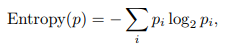
> __Gini index__: <br>  An alternative way, to Entropy, for picking features. Measures the "purity" of a split, e.g. each leaf contains one class --> "homogeneous branches". <br>  

> __Information gain__: <br> Increase of information: Entropy of the whole set minus the entropy when a particular feature is chosen: 
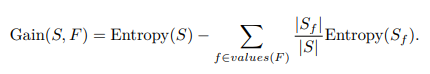 <br>
E.g. "uncertainty" before and after the split

### 2.2

When using the formula given in the previous answer (2.1 - Entropy): 
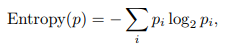
one gets:
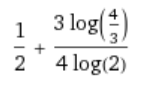 

### 2.3
> __A__: <br> 
E(solar system): 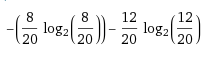
E(solar system, distance): 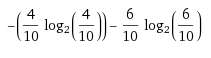
IG(solar system, distance) = E(solar system) - E(solar system, distance):
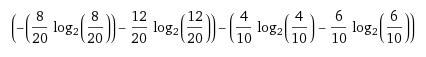
= 
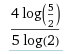

> __B__: <br>
G(solar system):
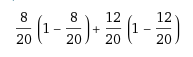
G(solar system, distance):
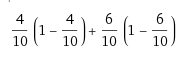
IG(solar system, distance) = G(solar system) - G(solar system, distance)
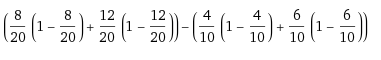
= 
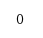

## Pruning Decision Trees

### 3.1 
> __A__: <br> 

    for node in dfs(tree): # Consider each node for pruning. Start on leaves and move updwards 

        sub_tree = tree.replaceNodeWLeaf(node) # for a sub tree of the tree 
    
        if(pred_error_val(sub_tree) <= pred_error_val(tree)): # if replacing --> !increased pred error 
    
            tree = sub_tree # replace node by a leaf 

> __B__: <br>
Naming the node integers kept after pruning: <br>
3, 6, 9 <br>

__Note to self__: Removing [4,5] because 1 > 0 (from hint), [10, 11], because 10 = 2, 11 = 0, 10 + 11 = 2 > 9 = 1 